In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import kagglehub
path = kagglehub.dataset_download("shubham47/salary-data-dataset-for-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-data-dataset-for-linear-regression


In [2]:
ds = pd.read_csv('/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv')
X = ds['YearsExperience'].values
Y = ds['Salary'].values

In [3]:
(X, Y)

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

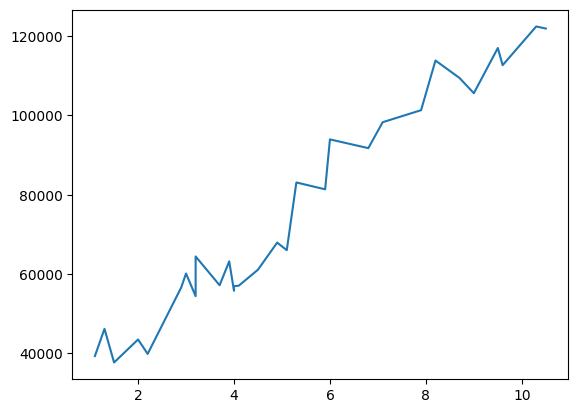

In [4]:
plt.plot(X,Y)

In [5]:
X  = np.array(X)
Y = np.array(Y)


In [6]:
(X,Y)

(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872]))

In [7]:
def mean(X):
    return (np.sum(X)/len(X))

In [8]:
def variance(X):
    mean_value = mean(X)
    return (np.sum((X-mean_value)**2)/len(X))

In [9]:
def norm(X):
    mean_value = mean(X)
    variance_value = variance(X)
    return (X - mean_value)/np.sqrt(variance_value)

In [10]:
X_norm = norm(X)


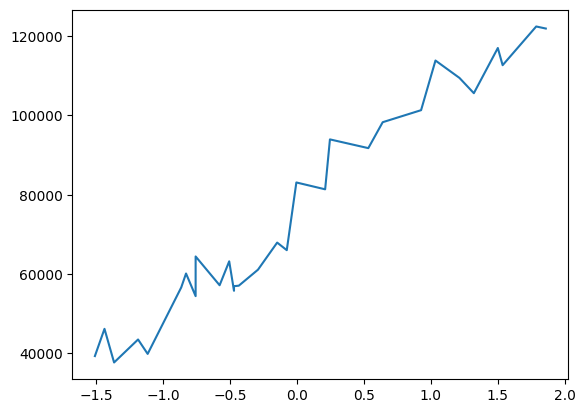

In [11]:
plt.plot(X_norm, Y)

In [12]:
class SimpleLinearRegression:
    def __init__(self, lr = 0.01, max_iter = 2000, threshold = 1e-8):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1, 1)
        self.bias = random.uniform(-1, 1)
    def predict(self, X):
        return (self.weight*X + self.bias)
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = (1/(2*n))*np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n)*np.sum(errors*X)
            b_grad = (1/n)*np.sum(errors)
            self.weight += self.lr*w_grad
            self.bias += self.lr*b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            curr_loss = (1/(2*n))*np.sum(errors**2)
            
            
            if np.abs(curr_loss-prev_loss)<self.threshold:
                break
            prev_loss = curr_loss
            loss_history.append(curr_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X, Y)
        plt.plot(X, y_pred)
            

In [13]:
model = SimpleLinearRegression()

In [14]:
loss_history = model.fit(X_norm, Y)


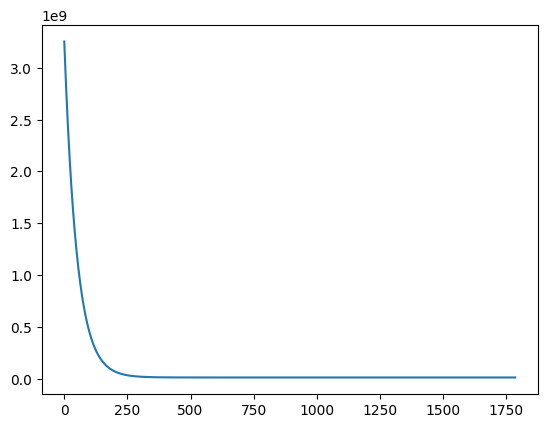

In [15]:
plt.plot(loss_history)

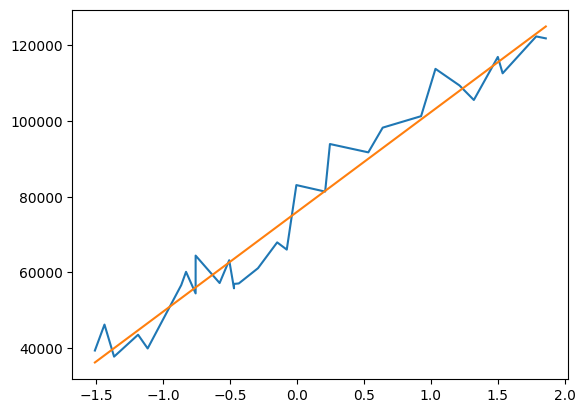

In [16]:
model.plot(X_norm, Y)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
X_norm = X_norm.reshape(-1, 1)

In [19]:
reg = LinearRegression().fit(X_norm, Y)

In [20]:
reg.score(X_norm, Y)

0.9569566641435086

In [21]:
reg.coef_ #weight

array([26367.18244354])

In [22]:
reg.intercept_ #bias

76003.0

In [23]:
Y_pred = reg.predict(X_norm)

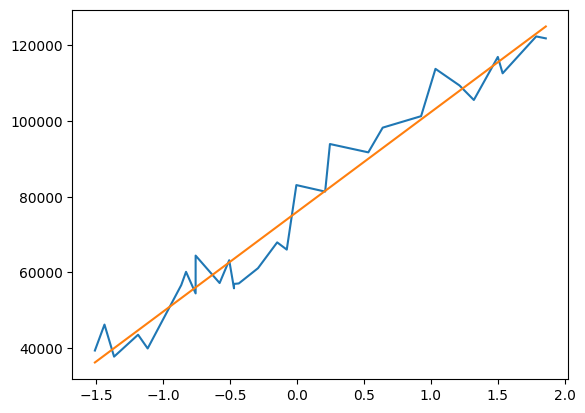

In [24]:
plt.plot(X_norm, Y)
plt.plot(X_norm, Y_pred)